In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
data = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")
data.head(10)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


## <span style='background :white' > `EDA` </span>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


# <span style='background :yellow' >PREPROCESSING DATA</span>

## `Removing Puncution, Stopwords, Upper Case, etc.`

In [4]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ", text)
    text = re.sub('[''""...]', '',text)
    return text
clean = lambda x: clean_text(x)

## `Clean Data`

In [5]:
data['Text'] = data.Text.apply(clean)
data.Text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [6]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:20]
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

## `Removing StopWords`

In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## `Let's calculate subjectivity and Polarity`

In [8]:
# function for subjectivity
def calc_subj(Text):
    return TextBlob(Text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(Text):
    return TextBlob(Text).sentiment.polarity
 
data['Subjectivity'] = data.Text.apply(calc_subj)
data['Polarity'] = data.Text.apply(calc_pola)
1
2
data.head(10)

,Unnamed: 0,Text,text,Subjectivity,Polarity
0,1,im an alien,im alien,0.750000,-0.250000
1,2,idaacarmack ray tracing on cyberpunk with hdr ...,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,3,joerogan spotify great interview,joerogan spotify great interview,0.750000,0.800000
3,4,doge is underestimated,doge underestimated,0.000000,0.000000
4,5,teslacn congratulations tesla china for amazin...,teslacn congratulations tesla china amazing ex...,0.366667,0.275000
5,6,happy new year of the ox,happy new year ox,0.727273,0.468182
6,7,frodo was the underdoge\nall thought he would ...,frodo underdoge thought would fail httpstcozgx...,0.400000,0.000000
7,8,owensparks flcnhvy haha thanks,owensparks flcnhvy haha thanks,0.250000,0.200000
8,9,flcnhvy indeed tweets definitely do not repre...,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,10,the most entertaining outcome is the most likely,entertaining outcome likely,0.675000,0.375000


## `Let's classify these tweets based on their sentiment(polarity)`

In [9]:
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
data['Sentiment'] = data.Polarity.apply(sentiment)
1
data.head(10)

,Unnamed: 0,Text,text,Subjectivity,Polarity,Sentiment
0,1,im an alien,im alien,0.750000,-0.250000,Negative
1,2,idaacarmack ray tracing on cyberpunk with hdr ...,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000,Netural
2,3,joerogan spotify great interview,joerogan spotify great interview,0.750000,0.800000,Positive
3,4,doge is underestimated,doge underestimated,0.000000,0.000000,Netural
4,5,teslacn congratulations tesla china for amazin...,teslacn congratulations tesla china amazing ex...,0.366667,0.275000,Positive
5,6,happy new year of the ox,happy new year ox,0.727273,0.468182,Positive
6,7,frodo was the underdoge\nall thought he would ...,frodo underdoge thought would fail httpstcozgx...,0.400000,0.000000,Netural
7,8,owensparks flcnhvy haha thanks,owensparks flcnhvy haha thanks,0.250000,0.200000,Positive
8,9,flcnhvy indeed tweets definitely do not repre...,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000,Netural
9,10,the most entertaining outcome is the most likely,entertaining outcome likely,0.675000,0.375000,Positive


## `Ratio of sentiment`

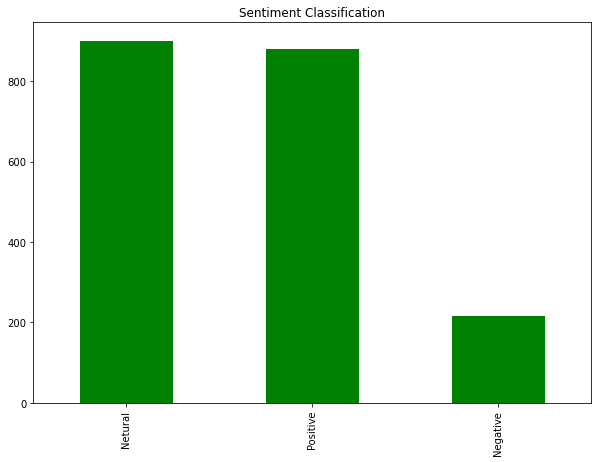

In [10]:
fig=plt.figure(figsize=(10,7))
data.Sentiment.value_counts().plot(kind='bar', color='green')
plt.title('Sentiment Classification')
plt.show()

Text(0, 0.5, 'Subjectivity')

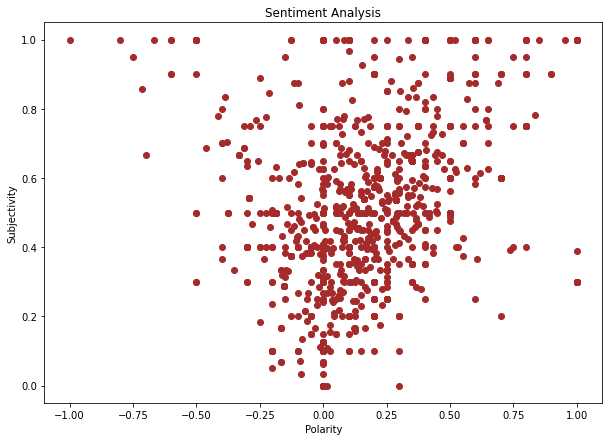

In [11]:
fig=plt.figure(figsize=(10,7))
plt.scatter(data.Polarity, data.Subjectivity, color='brown')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

## `Calculating percentage for different sentiment's class`

In [12]:
Data_sentiment = pd.DataFrame(data.Sentiment.value_counts(normalize=True)*100)
 
Data_sentiment['Total'] = data.Sentiment.value_counts()

Data_sentiment

,Sentiment,Total
Netural,45.072536,901
Positive,44.072036,881
Negative,10.855428,217
